In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d = pd.read_csv('/Users/connormcdonald/Desktop/Masters/MIT805/Assignment 2/Results/event_win_counter.csv', '\t')
d.columns = ['opening', 'wins']
d.loc[d.shape[0]] = ["queen\'s_pawn_game:_symmetrical_variation__pseudo-catalan", 793.0]
d.head()

,opening,wins
0,queen's_pawn_game:_torre_attack,708.0
1,queen's_pawn_game:_torre_attack__breyer_variation,1.0
2,queen's_pawn_game:_torre_attack__gossip_variation,161.0
3,queen's_pawn_game:_torre_attack__gruenfeld_var...,58.0
4,queen's_pawn_game:_torre_attack__gruenfeld_var...,44.0


In [3]:
d2 = pd.read_csv('/Users/connormcdonald/Desktop/Masters/MIT805/Assignment 2/Results/event_opening_counter.csv', '\t')
d2.columns = ['id', 'count']
d2.loc[d2.shape[0]] = ["queen's_pawn_game:_zurich_gambit",15]
d2.head()

,id,count
0,queen's_pawn_game_#2,13432
1,queen's_pawn_game_#3,3903
2,queen's_pawn_game__zukertort_variation,15
3,queen's_pawn_opening:_veresov__richter_attack,204
4,queen's_pawn_opening:_veresov_attack__irish_ga...,239


In [4]:
df = pd.merge(d, d2, left_on='opening', right_on='id', how='left').drop('id', axis=1)

In [5]:
df

,opening,wins,count
0,queen's_pawn_game:_torre_attack,708.0,1415
1,queen's_pawn_game:_torre_attack__breyer_variation,1.0,4
2,queen's_pawn_game:_torre_attack__gossip_variation,161.0,361
3,queen's_pawn_game:_torre_attack__gruenfeld_var...,58.0,93
4,queen's_pawn_game:_torre_attack__gruenfeld_var...,44.0,91
...,...,...,...
2818,queen's_pawn_game:_morris_countergambit,15.0,29
2819,queen's_pawn_game:_steinitz_countergambit,316.0,681
2820,queen's_pawn_game:_stonewall_attack,949.0,1883
2821,queen's_pawn_game:_symmetrical_variation,1240.0,2541


In [6]:
df['win_rate'] = round(100*df['wins']/df['count'], 2)
x = df[df['count'] > 1000]

In [9]:
x = x.sort_values(by=['win_rate'],ascending=False).head(5)
x

,opening,wins,count,win_rate
2122,king's_knight_opening,682.0,1097,62.17
318,scotch_game:_goering_gambit__double_pawn_sacri...,686.0,1123,61.09
1747,queen's_gambit_accepted:_saduleto_variation,634.0,1046,60.61
1504,scotch_game:_scotch_gambit,1323.0,2211,59.84
824,french_defense:_marshall_variation,644.0,1090,59.08


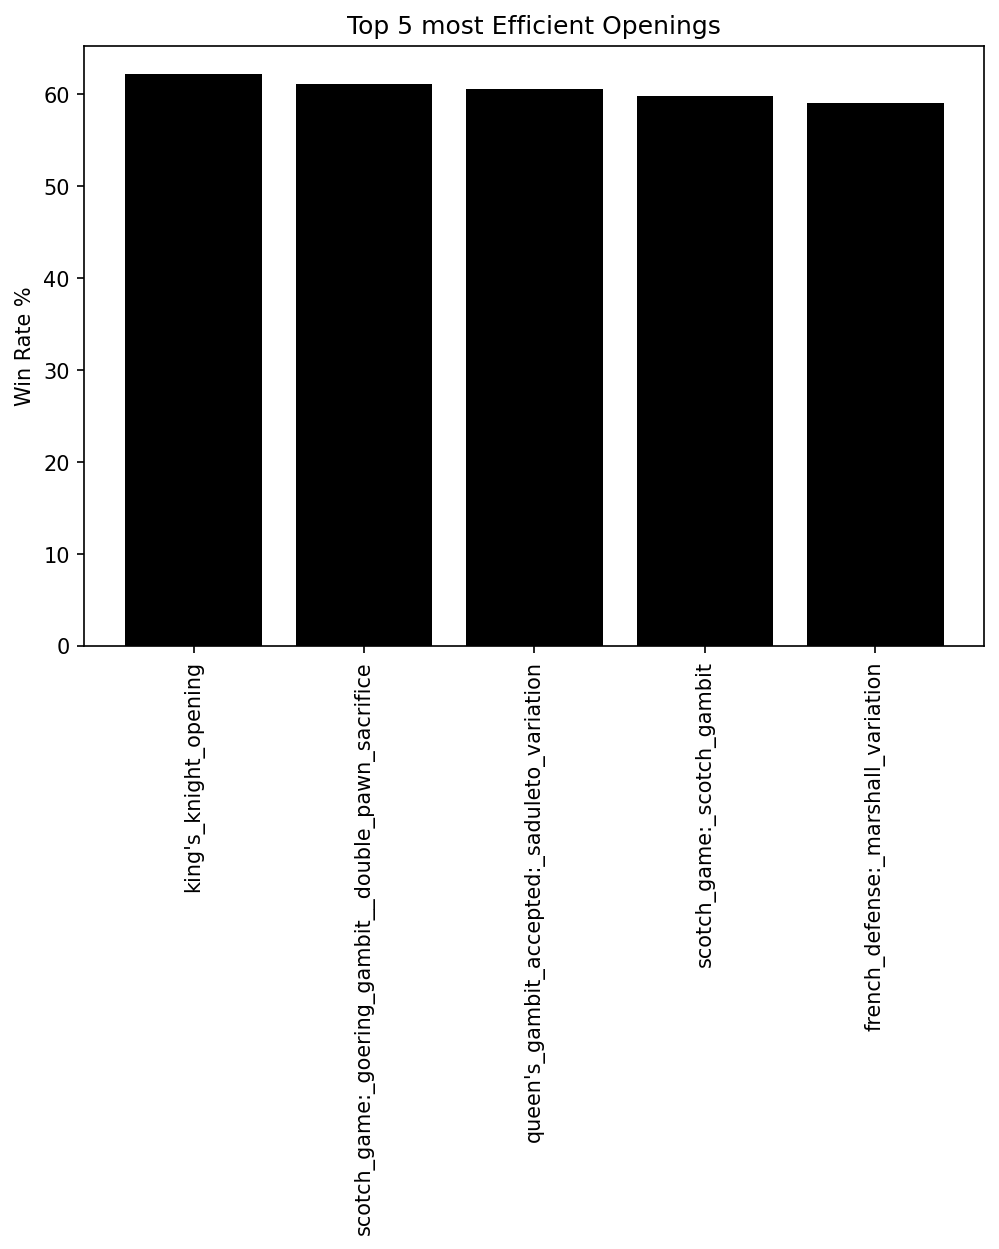

In [8]:
plt.rcParams['figure.dpi'] =150
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Opening = x['opening']
Win_rate = x['win_rate']
ax.bar(Opening,Win_rate, color = 'black')
plt.xticks(rotation=90)
plt.ylabel('Win Rate %')
plt.title('Top 5 most Efficient Openings')
plt.show()